# Assignment 3 - Supervised Learning

## *Shiwen Chen*
Netid:  *sc538*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model paramters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial dervatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear seperable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration of the algorithm. Divide you data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this you'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to?
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient?
3. Stopping criteria - when should the algorithm be finished searching for the optimum?

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different initializations, learning rates, and stopping criteria. What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why?

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing as well as using linear regression. Show ROC curves for both and your model all on one plot. How does your model compare in terms of performance?

**ANSWER**

(a) We wish to maximize the likelihood function of $\ell (w_0,w_1,w_2) = \prod_{i:y_i=1}\sigma(\mathbf{w}^T \mathbf{x}_i)\prod_{i':y_{i'}=0}(1-\sigma(\mathbf{w}^T \mathbf{x}_{i'}))$

(b) $C(w) = - \sum_{i:y_i=1}ln(\sigma(\mathbf{w}^T \mathbf{x}_i)) - \sum_{i':y_{i'}=0}ln(1-\sigma(\mathbf{w}^T \mathbf{x}_{i'}))$

(c)$\nabla_{\mathbf{w}}C(\mathbf{w}) = $

$[- \sum_{i:y_i=1}(1-\sigma(\mathbf{w}^T \mathbf{x}_i))x_{i,0}+\sum_{i':y_{i'}=0}\sigma(\mathbf{w}^T \mathbf{x}_{i'})x_{i',0},$

$- \sum_{i:y_i=1}(1-\sigma(\mathbf{w}^T \mathbf{x}_i))x_{i,1}+\sum_{i':y_{i'}=0}\sigma(\mathbf{w}^T \mathbf{x}_{i'})x_{i',1},$

$- \sum_{i:y_i=1}(1-\sigma(\mathbf{w}^T \mathbf{x}_i))x_{i,2}+\sum_{i':y_{i'}=0}\sigma(\mathbf{w}^T \mathbf{x}_{i'})x_{i',2}]$

(d) $w^{(i+1)} = w^{(i)} - \eta \nabla_{\mathbf{w}}C(\mathbf{w}^{(i)})$


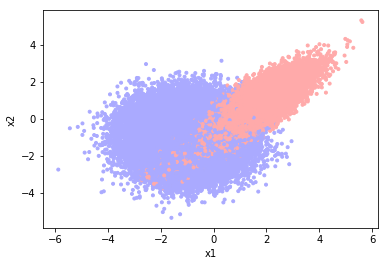

In [1]:
# Question e
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
data = pd.read_csv("./A3_Q1_data.csv") #import data
plt.scatter(data['x1'], data['x2'], c = data['y'], 
            cmap = cmap_light, marker = '.') #plot scatter
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

(e) Most of the data is seperable while some part of the data have overlap between classes. Logistic regression moght not be a good choice for these data because it classifies data by drawing a line. The actually data can use more non-linear seperator.

(f) There is no missing data in the dataset and no preprocessing is needed.

In [3]:
# Question g
import math
def confidence_prob(w, x): 
    a = sum(w*x)
    p = 1/(1 + math.exp(-a))
    return p   

In [4]:
# Question h
def cost_grad(w, x, y): #Calculate both cost and gradient
    c = 0
    g = np.array([0.0, 0.0, 0.0])
    for i in range(len(x)):
        a = np.r_[1,x[i]]
        p = confidence_prob(w, a)
        if y[i] == 1:
            c -= np.log(p)
            g -= (1-p)*a
        else:
            c -= np.log(1-p)
            g += p*a
    return c, g

In [5]:
#Question i & j
def grad_des(x_train, y_train, x_test, y_test, rate=None, tresh=None, w=np.array([0, 0, 0])):
    if rate == None:
        rate = 0.0001
    if tresh==None:
        tresh = 0.1
    c, g = cost_grad(w, x_train, y_train)
    cost = c + tresh + 1 
    i = 0
    while (cost - c > tresh):
        w = w - rate*g
        cost = c
        c, g = cost_grad(w, x_train, y_train)
        c_test, g_test = cost_grad(w, x_test, y_test)
        i += 1
        print('loop ', i, '\tw0,w1,w2=', w,
              '\n training cost:', c, '\ttest cost:', c_test)
    print('*The cost is not adjusted to the number of samples')
    return w

In [6]:
from sklearn.model_selection import train_test_split
#prepare data
x1 = data['x1'].values
x2 = data['x2'].values
y = data['y'].values
x = np.c_[x1,x2]
#split data set 
test_p = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_p)
w = grad_des(x_train, y_train, x_test, y_test)

loop  1 	w0,w1,w2= [ 0.0134     -3.67586484 -2.10065982] 
 training cost: 34716.6501567 	test cost: 14737.0567614
loop  2 	w0,w1,w2= [-0.4139823  -3.41782134 -1.3961186 ] 
 training cost: 28520.6656683 	test cost: 12097.6248017
loop  3 	w0,w1,w2= [-0.57935403 -3.11178863 -0.94340152] 
 training cost: 25885.8395229 	test cost: 10976.3171367
loop  4 	w0,w1,w2= [-0.56138153 -2.81930038 -0.71317664] 
 training cost: 24680.4022887 	test cost: 10466.7152702
loop  5 	w0,w1,w2= [-0.47076833 -2.56888455 -0.60394667] 
 training cost: 23931.4412434 	test cost: 10152.4336428
loop  6 	w0,w1,w2= [-0.38002572 -2.36622941 -0.5378107 ] 
 training cost: 23456.8321246 	test cost: 9954.6370699
loop  7 	w0,w1,w2= [-0.3095086  -2.2118293  -0.49135381] 
 training cost: 23191.2310995 	test cost: 9845.13763221
loop  8 	w0,w1,w2= [-0.25965883 -2.10226261 -0.46020129] 
 training cost: 23062.5023566 	test cost: 9793.10211771
loop  9 	w0,w1,w2= [-0.22703973 -2.02976671 -0.44090512] 
 training cost: 23008.1511134 	

In [248]:
w_init = np.array([2, 2, 2])
grad_des(x_train, y_train, x_test, y_test, w = w_init)

loop  1 	w0,w1,w2= [ 1.53751791 -5.24845062 -2.52571804] 
 training cost: 50604.1465576 	test cost: 22016.5417951
loop  2 	w0,w1,w2= [ 0.808583   -5.02832264 -1.70919247] 
 training cost: 39505.5778797 	test cost: 17236.9513132
loop  3 	w0,w1,w2= [ 0.31497143 -4.70533355 -1.0728997 ] 
 training cost: 32996.5544239 	test cost: 14418.5435664
loop  4 	w0,w1,w2= [ 0.03430027 -4.3279897  -0.64520154] 
 training cost: 29532.4839921 	test cost: 12904.6241171
loop  5 	w0,w1,w2= [-0.08288333 -3.94121229 -0.40795438] 
 training cost: 27570.0292169 	test cost: 12039.4716321
loop  6 	w0,w1,w2= [-0.10414623 -3.57343906 -0.30136711] 
 training cost: 26192.5914124 	test cost: 11428.3531496
loop  7 	w0,w1,w2= [-0.08872772 -3.23776758 -0.26092221] 
 training cost: 25114.622049 	test cost: 10947.7009681
loop  8 	w0,w1,w2= [-0.06960524 -2.94106292 -0.24853538] 
 training cost: 24293.2137769 	test cost: 10579.1162308
loop  9 	w0,w1,w2= [-0.05850327 -2.68839208 -0.24993968] 
 training cost: 23711.0159782 	

array([-0.17834945, -1.93938556, -0.41168585])

In [252]:
grad_des(x_train, y_train, x_test, y_test, rate=0.00005)

loop  1 	w0,w1,w2= [  4.00000000e-04  -1.84248708e+00  -1.05284419e+00] 
 training cost: 24902.3142451 	test cost: 10787.9941136
loop  2 	w0,w1,w2= [-0.18166608 -1.85340344 -0.80550266] 
 training cost: 23431.3988985 	test cost: 10152.619332
loop  3 	w0,w1,w2= [-0.26424879 -1.85624505 -0.65978467] 
 training cost: 23013.6849756 	test cost: 9971.71588084
loop  4 	w0,w1,w2= [-0.28973535 -1.86102537 -0.5822561 ] 
 training cost: 22914.0269412 	test cost: 9928.58706808
loop  5 	w0,w1,w2= [-0.28941957 -1.86793869 -0.54065906] 
 training cost: 22885.3447902 	test cost: 9916.43885084
loop  6 	w0,w1,w2= [-0.27985162 -1.8754187  -0.5158377 ] 
 training cost: 22871.8359759 	test cost: 9910.96728993
loop  7 	w0,w1,w2= [-0.26805709 -1.88255901 -0.49888438] 
 training cost: 22863.068709 	test cost: 9907.55728934
loop  8 	w0,w1,w2= [-0.25661791 -1.88903945 -0.48602373] 
 training cost: 22856.802155 	test cost: 9905.20038585
loop  9 	w0,w1,w2= [-0.24633746 -1.89480462 -0.47564532] 
 training cost: 22

array([-0.1915525 , -1.92875225, -0.42417504])

In [251]:
grad_des(x_train, y_train, x_test, y_test, tresh = 10)

loop  1 	w0,w1,w2= [  8.00000000e-04  -3.68497417e+00  -2.10568837e+00] 
 training cost: 34461.6824025 	test cost: 14999.4904011
loop  2 	w0,w1,w2= [-0.42190805 -3.43032184 -1.40506882] 
 training cost: 28355.4448682 	test cost: 12356.4834388
loop  3 	w0,w1,w2= [-0.58584741 -3.12859061 -0.95342221] 
 training cost: 25750.4728748 	test cost: 11216.4629516
loop  4 	w0,w1,w2= [-0.56846664 -2.83972621 -0.7212427 ] 
 training cost: 24555.5421412 	test cost: 10686.5053796
loop  5 	w0,w1,w2= [-0.47817144 -2.59160515 -0.60950759] 
 training cost: 23811.339487 	test cost: 10353.4649686
loop  6 	w0,w1,w2= [-0.38658876 -2.38986699 -0.54159445] 
 training cost: 23335.1658316 	test cost: 10138.0774708
loop  7 	w0,w1,w2= [-0.3146721  -2.23510368 -0.49362247] 
 training cost: 23064.6448686 	test cost: 10013.4646384
loop  8 	w0,w1,w2= [-0.26331136 -2.1242686  -0.46103503] 
 training cost: 22930.9723848 	test cost: 9949.96212934
loop  9 	w0,w1,w2= [-0.22928055 -2.05014272 -0.44051947] 
 training cost: 

array([-0.19601791, -1.97513861, -0.42174526])

(k)

The program is very sensitive to the parameters. If the learning rate is not small enough, or if the intial value is chosen at points with huge gradient, it will cause a large value of w that make exp in log odd function hard to calculate. 

Intializations: The defalt intializaion is at [0, 0, 0]. A intial point closer to the actual value can reduce the steps needed for similar results (24 loops for [2, 2, 2] and 15 loops for [0, 0, 0]). However, we have no idea of the actual value before we start testing. Therefore, the points are chosen at will.

Learning rates: The default learning rate is set at 0.0001. A larger learning rate can cause problem for this dataset. When other parameters are fixed. A larger learning rate takes less step to reach similar conclusions (15 loops for 0.0001 and 22 loops for 0.00005)

Stopping criteria: The difference in cost between steps is used as criteria. If the difference is smaller than a certain threshhold, we stop calculating. Larger threshhold can affect the accuracy of result but at the same time reduce steps (15 loops for 0.0001 and 11 loops for 10, result in obvious different w). The default threshhold is set at 0.1 bacause treshholds smaller than 0.1 don't give very different results.

In [8]:
# A modified gradient descent without taking in test data and printing cost
def grad_des_2(x_train, y_train, rate=None, tresh=None, w=np.array([0, 0, 0])):
    if rate == None:
        rate = 0.0001
    if tresh==None:
        tresh = 0.1
    c, g = cost_grad(w, x_train, y_train)
    cost = c + tresh + 1 
    i = 0
    while (cost - c > tresh):
        w = w - rate*g
        cost = c
        c, g = cost_grad(w, x_train, y_train)   
        i += 1
    return w

In [9]:
# Question l 
from sklearn.model_selection import StratifiedKFold
#cross validation
k = 5
prediction_scores = np.empty(y.shape[0],dtype='object')
kf = StratifiedKFold(n_splits=10, shuffle=True)
for train_index, val_index in kf.split(x, y):
    x_train, x_val = x[train_index], x[val_index]
    y_train = y[train_index]
    w = grad_des_2(x_train, y_train)
    # predict:
    p = np.empty(x_val.shape[0])
    for i in range(len(x_val)):
        a = np.r_[1,x_val[i]]
        p[i] = confidence_prob(w, a)
    prediction_scores[val_index] = p
print('Done')

Done


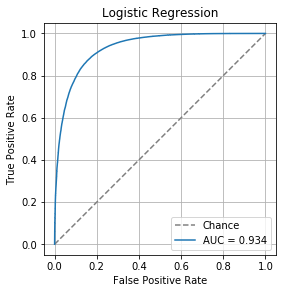

In [10]:
import sklearn.metrics as metrics
#make ROC curve
def make_roc(y, score, title):
    fpr, tpr, _ = metrics.roc_curve(y, score, pos_label=1)
    auc = metrics.roc_auc_score(y, score)
    legend_string = 'AUC = {:0.3f}'.format(auc)
    plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
    plt.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.tight_layout()
    plt.title(title)
make_roc(y, prediction_scores,'Logistic Regression')
plt.show()

(m)

Comparing with spliting the dataset to training and test set, cross validation can use all the data for testing and larger dataset can reduce error. Also, if we are looking at the same test dataset for accuarcy when chosing model, we may easily overfit the data. The way cross-validation works can avoid this kind of over-fitting.

In [12]:
# Question n
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_p)
w = grad_des_2(x_train, y_train)
xx,yy = np.meshgrid(np.arange(-6,6,0.01),np.arange(-6,6,0.01))
p = np.empty(xx.ravel().shape[0])
x_re = np.c_[xx.ravel(),yy.ravel()]
for i in range(len(x_re)):
    a = np.r_[1,x_re[i]]
    p[i] = confidence_prob(w, a)
p = p.reshape(xx.shape)

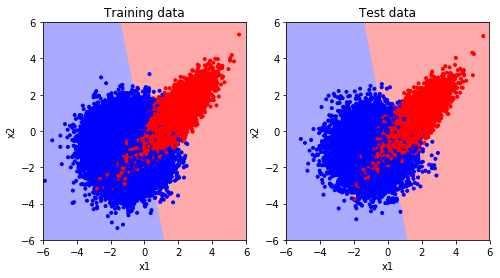

In [13]:
# plot
cmap_bold = ListedColormap(['#FF0000',  '#0000FF'])
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.pcolormesh(xx, yy, p, cmap=cmap_light)
#training
plt.scatter(x_train[:,0], x_train[:,1], c = y_train,
            cmap = cmap_bold, marker = '.')
plt.title('Training data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.subplot(1,2,2)
plt.pcolormesh(xx, yy, p, cmap=cmap_light)
#test
plt.scatter(x_test[:,0], x_test[:,1], c = y_test,
            cmap = cmap_bold, marker = '.') 
plt.title('Test data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show() 

(n) 

The boundary can seperate most of the data and works well on test data. However, the decision boundary is linear while the data can some non-linear boundaries may better seperate the data.

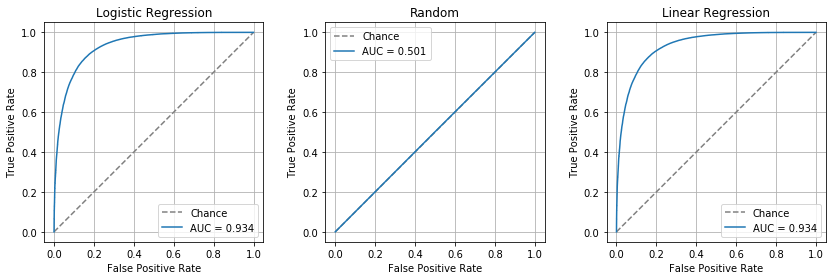

In [14]:
# Question o
from sklearn.linear_model import LinearRegression
#random guessing:
pred_rand = np.random.choice([0, 1], size=(len(prediction_scores),))
#linear regression (cross val):
lm = LinearRegression()
pred_linear = np.empty(y.shape[0],dtype='object')
kf = StratifiedKFold(n_splits=10, shuffle=True)
for train_index, val_index in kf.split(x, y):
    x_train, x_val = x[train_index], x[val_index]
    y_train = y[train_index]
    lm.fit(x_train, y_train)
    pred = lm.predict(x_val)
    pred_linear[val_index] = pred
#plot
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
make_roc(y, prediction_scores,'Logistic Regression')
plt.subplot(1,3,2)
make_roc(y, pred_rand,'Random')
plt.subplot(1,3,3)
make_roc(y, pred_linear,'Linear Regression')
plt.show()

(o)

Both logistic regression and linear regression shows a high AUC value that indicate good classification performance over random guessing. Also, the performance of linear regression is almost the same as logistic regression.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a linear model classifier (e.g. logistic regression) apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) Area Under the Curve (AUC). Describe the implications of your findings.

**ANSWER**

In [40]:
#Question a
#import data
#pip install python-mnist
from mnist import MNIST
mndata = MNIST('samples')
img_train, label_train = mndata.load_training()
img_test, label_test = mndata.load_testing()
#print(mndata.display(img_train[7]))

In [41]:
#transform labels (3 to 1, otherwise 0)
#label type is array.array
y_train = []
for i in range(len(label_train)): 
    if label_train[i] == 3:
        y_train.append(1)
    else:
        y_train.append(0)
y_train = np.asarray(y_train)
y_test = []
for i in range(len(label_test)): 
    if label_test[i] == 3:
        y_test.append(1)
    else:
        y_test.append(0)
y_test = np.asarray(y_test)

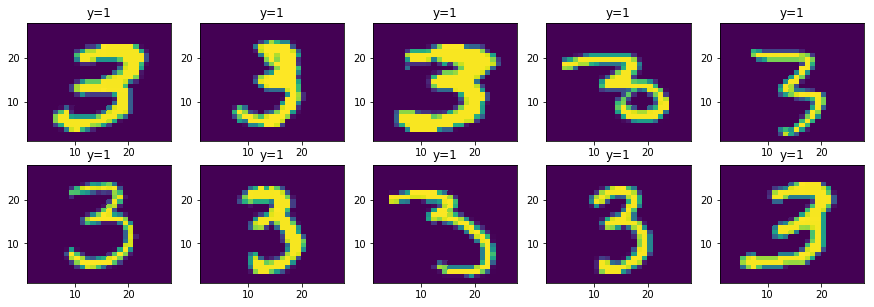

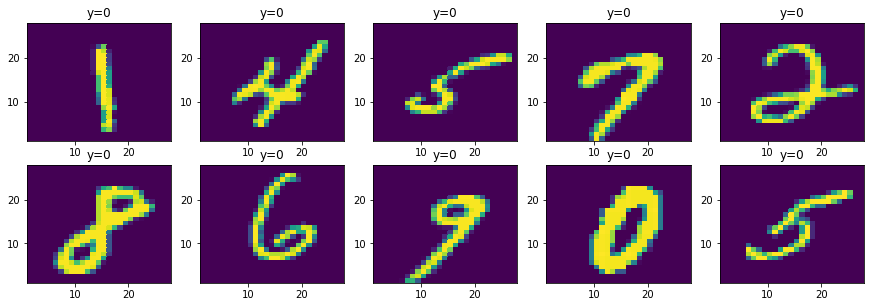

In [5]:
def plot_mnist(img, title):
    r = [i for i in range(1,29)]
    xx, yy = np.meshgrid(np.arange(1,29,1),np.arange(28,0,-1))
    z = np.asarray(img).reshape(xx.shape)
    plt.pcolormesh(xx, yy, z)
    plt.title(title)
#plot samples
true_index = [7, 10, 27, 30, 44, 50, 74, 86, 98, 107]
false_index = [8, 9, 11, 15, 16, 31, 32, 33, 34, 35]
plt.figure(figsize=(15,10))
for i in range(len(true_index)):
    plt.subplot(4,5,i+1)
    plot_mnist(img_train[true_index[i]],'y=1')
plt.show()
plt.figure(figsize=(15,10))
for i in range(len(false_index)):
    plt.subplot(4,5,i+6)
    plot_mnist(img_train[false_index[i]],'y=0')
plt.show()

In [6]:
# Question c
print('number of y = 1:', np.sum(y_train==1),
      'number of y = 0:', np.sum(y_train==0))

number of y = 1: 6131 number of y = 0: 53869


(c)

among the 60,000 training samples, only about 10% (6131) of them are in class 1 while others are in class 0. this unbalance in class size will make the accuracy unreliable. For example, if we classify all the samples to class 0, the overall accuracy would be almost 90%, but it's obvious that it's not a effective way of classification. Therefore, we should refer to AUC for evaluation.

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
#transfer img into binary
img_train = np.asarray(img_train)
tresh = 180
x_training = (img_train * (img_train > tresh)) > 0
#cross val:
pred_logi = np.empty(y_train.shape[0],dtype='object')
k_fold = 5
kf = StratifiedKFold(n_splits=k_fold, shuffle=True)
for train_index, val_index in kf.split(x_training, y_train):
    x_train, x_val = x_training[train_index], x_training[val_index]
    y_training = y_train[train_index]
    clf.fit(x_train, y_training)
    predict = clf.predict_proba(x_val)
    pred_logi[val_index] = predict[:,1]
print('done')

done


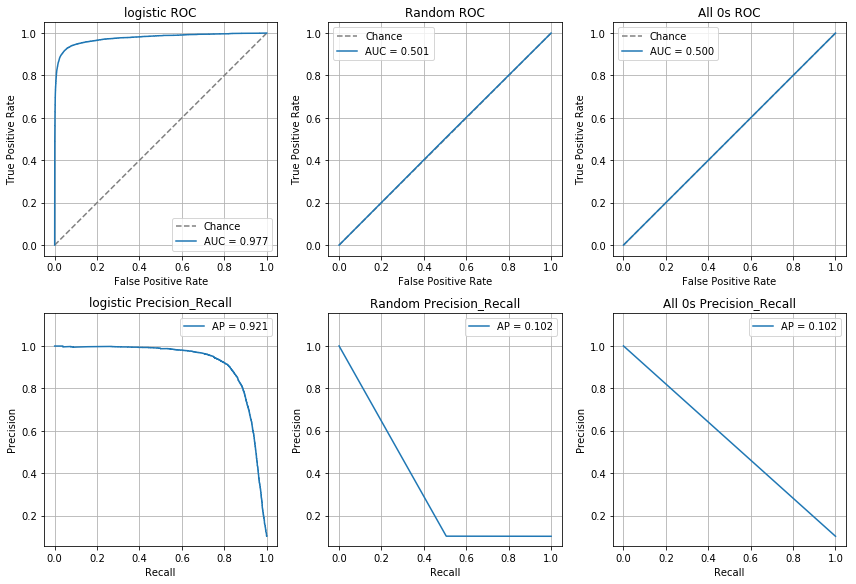

In [39]:
#make precision recall plot
def make_Prec_recall(y, score, title):
    precision, recall, _ = metrics.precision_recall_curve(y, score, pos_label=1)
    AP = metrics.average_precision_score(y, score)
    legend_string = 'AP = {:0.3f}'.format(AP)
    #plt.step(recall, precision, where='post')
    plt.plot(recall, precision, label=legend_string)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.tight_layout()
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.title(title)
    
#random guessing:
pred_random = np.random.choice([0, 1], size=(len(img_train),))
#all not 3
pred_negetive = np.zeros([len(img_train),])
#plot
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
make_roc(y_train, pred_logi,'logistic ROC')
plt.subplot(2,3,2)
make_roc(y_train, pred_random,'Random ROC')
plt.subplot(2,3,3)
make_roc(y_train, pred_negetive,'All 0s ROC')
plt.subplot(2,3,4)
make_Prec_recall(y_train, pred_logi,'logistic Precision_Recall')
plt.subplot(2,3,5)
make_Prec_recall(y_train, pred_random,'Random Precision_Recall')
plt.subplot(2,3,6)
make_Prec_recall(y_train, pred_negetive,'All 0s Precision_Recall')
plt.show()

(d) 

The algorithm works pretty well on data with high AUC and high average precision. The random guessing and guess all to be 0, however, have similar poor performance. 

In [76]:
#cost function
def logi_cost(p, y): #pred, y_test if calculating test cost
    c = 0
    for i in range(len(p)):
        if y[i] == 1:
            c -= np.log(p[i])
        else:
            c -= np.log(1-p[i])
    return c

#F_1 score
def F_1(y, score):
    tresh = 0.5
    score = (score > tresh).astype(int)
    t = np.sum(y)
    f = len(y) - t
    (y * 2 - score) == 1
    tp = np.sum((y * 2 - score) == 1)
    fn = t - tp
    tn = np.sum(y == score) - tp
    fp = f - tn
    precision = tp / (tp + fp)
    recall = tp / t
    f_1 = 2 / (1/precision + 1/recall)
    return f_1
#auc = metrics.roc_auc_score(y, score)

In [91]:
c = np.arange(0.1,5,0.1)
img_test = np.asarray(img_test)
tresh = 180
x_test = (img_test * (img_test > tresh)) > 0
#
n = np.zeros([len(c)]) #number of para
cost = np.zeros([len(c)]) #test cost
f = np.zeros([len(c)]) #f1 value
auc = np.zeros([len(c)]) #auc
for i in range(len(c)):
    lr = LogisticRegression(penalty='l1', C=c[i])
    lr.fit(x_training, y_train)
    n[i] = np.sum(lr.coef_ > 0)
    p = lr.predict_proba(x_test)
    p = p[:,1]
    cost[i] = logi_cost(p, y_test) #cost for test data
    f[i] = F_1(y_test, p)
    auc[i] = metrics.roc_auc_score(y_test, p)

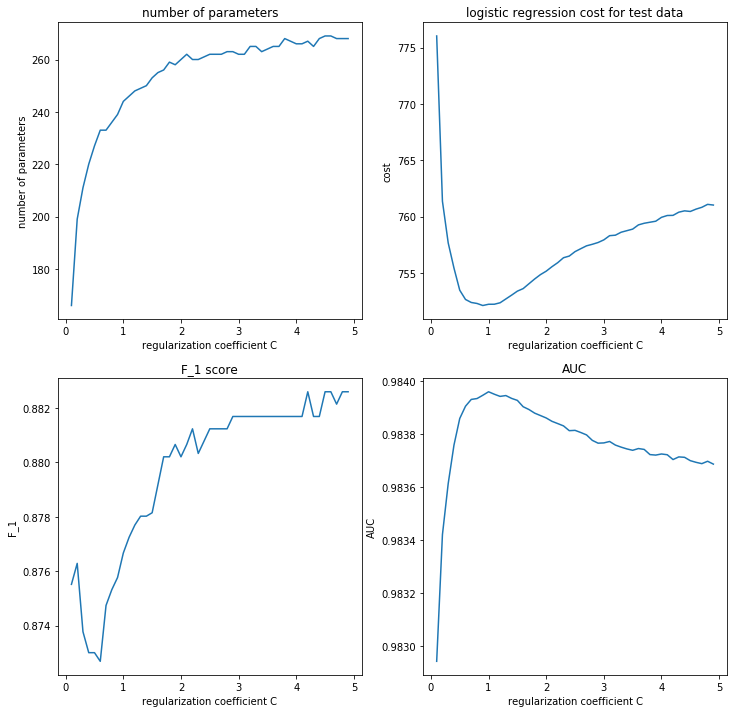

In [90]:
#plot
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(c,n)
plt.xlabel('regularization coefficient C')
plt.ylabel('number of parameters')
plt.title('number of parameters')
plt.subplot(2,2,2)
plt.plot(c,cost)
plt.xlabel('regularization coefficient C')
plt.ylabel('cost')
plt.title('logistic regression cost for test data')
plt.subplot(2,2,3)
plt.plot(c,f)
plt.xlabel('regularization coefficient C')
plt.ylabel('F_1')
plt.title('F_1 score')
plt.subplot(2,2,4)
plt.plot(c,auc)
plt.xlabel('regularization coefficient C')
plt.ylabel('AUC')
plt.title('AUC')
plt.show()

(f)

Larger regularization strength can reduce the number of parameters, which can reduce the complexity of model. The cost for test data first decreases with C then increase, and AUC shows a opposite trend. The lowest cost and highest AUC appears around C=1. It means the classifier is performing well at C=1. F_score is the harmonic mean of precision and recall that are associated with the chance of true positive classification. If we are focusing on correctly identify positive value and care less about negetive values, we would want higher F_1 score. In this case, a larger C can produce higher F_1 scores.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performend, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to descrive this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

Kickstarter is an American public-benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity. Kickstarter has reportedly received more than $1.9 billion in pledges from 9.4 million backers to fund 257,000 creative projects, such as films, music, stage shows, comics, journalism, video games, technology and food-related projects (wikipedia, 2018). While some projects on Kickstarter are successfully funded, many other fails. There could be some recognizable factors that make projects more likely to succeed. This study is trying to look into the outcomes of individual kickstarter projects to identify the pattern of success.

Main questions of interest:

- What factors contribute to a successful kickstarter project?

- How well can we predict the outcome of a project? 

**dataset**

The dataset is obtained from Kaggle, uploaded by [Kemical](https://www.kaggle.com/kemical/kickstarter-projects). The dataset contains the following information:

In [112]:
data = pd.read_csv("ks_projects_201801.csv", low_memory=False)
print('number of entries:', len(data.ID.values))
data.head()

number of entries: 378661


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


**Exploring data**

The dataset has no missing value. The only problem is the distribution of goal is positively skewed. As shown below, the goal data after log10 transformation has better distribution. Therefore, we will use the log goal instead of goal. 

Moreover, the outcomes of projects, as noted in the dataset, fall into multiple categories, including successful, failed, canceled, undefined, live, and suspended. However, we only want to look into closed projects and only want to know if it succeeded. Therefore, The projects from live and undefined class are removed and the remaining projects are reclassified into 1 (successful) and 0(unsuccessful).

The potential predictors are examined by plots below:

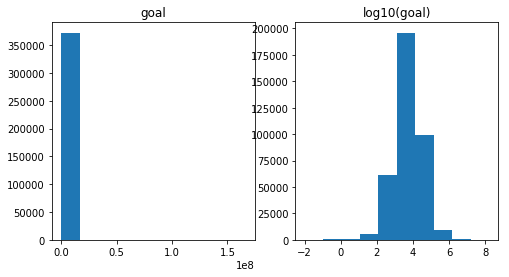

In [142]:
data = data[(data.state=='live')== False] #remove live
data = data[(data.state=='undefined')== False] #remove undefined
#extract and process values from data frame
category = data.main_category.values
goal = data.usd_goal_real.values #into usd
country = data.country.values
state = data.state.values
outcome = (state == 'successful') #whether success or not
log_goal = np.log10(goal)
#
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(goal)
plt.title('goal')
plt.subplot(1,2,2)
plt.hist(log_goal)
plt.title('log10(goal)')
plt.show()

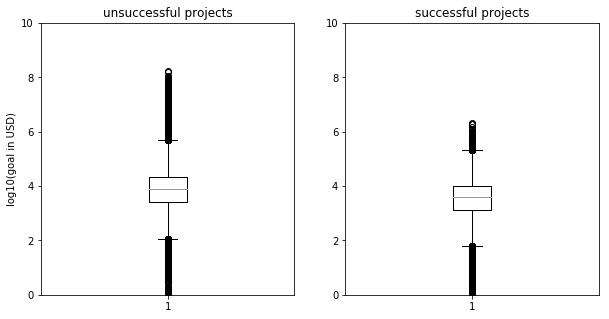

In [108]:
# goal
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(log_goal[outcome==0])
plt.ylabel('log10(goal in USD)')
plt.title('unsuccessful projects')
plt.ylim([0, 10])
plt.subplot(1,2,2)
plt.boxplot(log_goal[outcome==1])
plt.title('successful projects')
plt.ylim([0, 10])
plt.show()

From the above boxplots, we can see that the projects with different outcomes have different distribution in goals. Successful projects have lower min goal and lower max goal.

(The goal is transformed to log10(goal) for less skewed distribution)

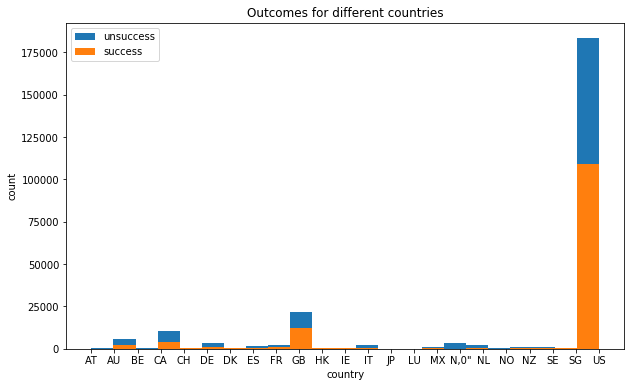

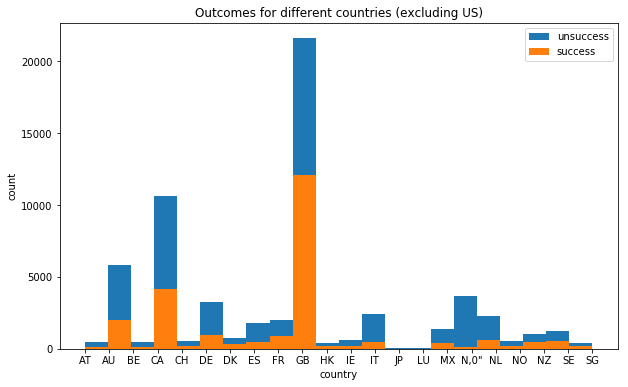

In [93]:
# country
plt.figure(figsize=(10,6))
plt.hist(country[outcome == 0], label = 'unsuccess', bins = 23)
plt.hist(country[outcome == 1], stacked=True, label = 'success', bins = 23)
plt.xlabel('country')
plt.ylabel('count')
plt.title('Outcomes for different countries')
plt.legend()
plt.show()
#outside US
plt.figure(figsize=(10,6))
plt.hist(country[country != 'US'][outcome[country != 'US'] == 0],
         label = 'unsuccess', bins = 22)
plt.hist(country[country != 'US'][outcome[country != 'US'] == 1],
         stacked=True, label = 'success', bins = 22)
plt.xlabel('country')
plt.ylabel('count')
plt.title('Outcomes for different countries (excluding US)')
plt.legend()
plt.show()

From the above two histograms, we can see that the rate of success is different for countries. In US and British, more than half of the projects succeeded while it seems harder to succeed in other counties. Therefore, the country can be a good predictor for our model.

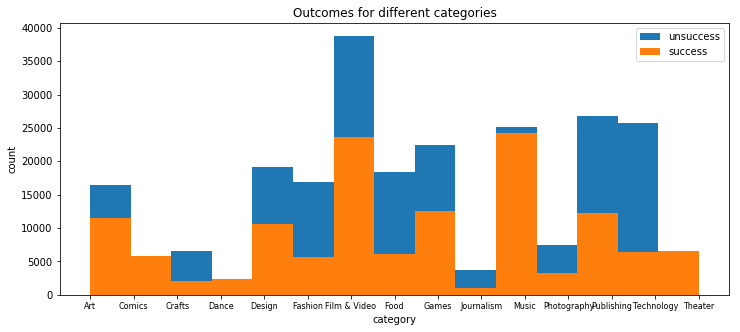

In [254]:
plt.figure(figsize=(12,5))
plt.hist(category[outcome == 0], label = 'unsuccess', bins = 15)
plt.hist(category[outcome == 1], stacked=True, label = 'success', bins = 15)
plt.xlabel('category')
plt.ylabel('count')
plt.title('Outcomes for different categories')
plt.xticks(fontsize = 8)
plt.legend()
plt.show()

As shown in above graph, the success rate also varies among different categories of projects. Certain types of projects are easier to succeed. 

Therefore, the selected features for classification are:

- Goal: The amount of money the project aims to raise (converted to USD)

- country: The country in which the project is lauched (reclassified to three categories: US, GB and others)

- Category: The category the project belongs to

The target variable is:

- Outcome: Whether a closed project succeeded or not (binary)

The learning technique is logistic regression with L2 regularization. Because the two of the predictors are categorical. Those predictor can be taken as 'dummy variable' in logistic regression. Also, the binary response is easy for logistic regression to predict. As there is many classes in the category predictor, lasso regularization will be used to reduce number of variables. 

The binary classification performance will be evaluated by ROC curve that is unbiased for unbalanced dataset. As the dataset is already very large (372,300 entries), to save time, we will seperate the dataset into training and test set instead of conducting cross validation.

In [151]:
# reclassify country:
country_re = country
for i in range(len(country)):
    if country[i]=='US':
        country_re[i] = 'US'
    elif country[i]=='GB':
        country_re[i] = 'GB'
    else:
        country_re[i] = 'other'
        
#produce dummy variables
country_name = ['US', 'GB', 'other']
category_name = ['Art', 'Comics', 'Crafts', 'Dance', 'Design',
                 'Fashion', 'File & Video', 'Food', 'Games',
                 'Journalism', 'Music', 'Photography', 'Publishing',
                 'Technology', 'Theater' ]
country_d = np.empty([len(country_name),len(country)], dtype='bool')
category_d = np.empty([len(category_name),len(category)], dtype='bool')
for i in range(len(country_name)):
    country_d[i,] = (country_re == country_name[i])
country_d = country_d.T
for i in range(len(category_name)):
    category_d[i,] = (category == category_name[i])
category_d = category_d.T

#combine features:
x = np.c_[log_goal, country_d, category_d]      

In [166]:
#regression
test_p = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, outcome, test_size = test_p)
logi = LogisticRegression(penalty='l2')
logi.fit(x_train, y_train)
pred_outcome_p = logi.predict_proba(x_test)
pred_outcome_p = pred_outcome_p[:,1]
pred_outcome = logi.predict(x_test)
coef = logi.coef_

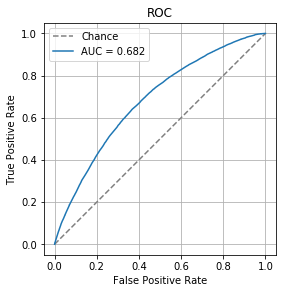

In [176]:
#roc
make_roc(y_test, pred_outcome_p, 'ROC')
plt.show()

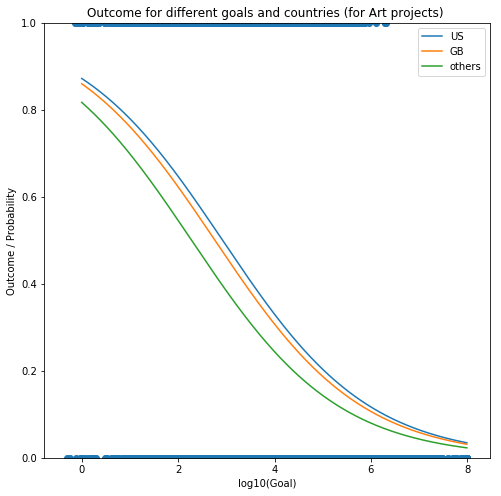

In [248]:
#plot test result
x_plot_u = np.zeros([800, len(coef[0])])
x_plot_b = np.zeros([800, len(coef[0])])
x_plot_o = np.zeros([800, len(coef[0])])
for i in range(800):
    x_plot_u[i,0] = x_plot_b[i,0] = x_plot_o[i,0] = 0.01 * i
    x_plot_u[i,1] = 1
    x_plot_b[i,2] = 1
    x_plot_o[i,3] = 1
    x_plot_u[i,4] = x_plot_b[i,4] = x_plot_o[i,4] = 1
y_plot_u = logi.predict_proba(x_plot_u)
y_plot_b = logi.predict_proba(x_plot_b)
y_plot_o = logi.predict_proba(x_plot_o)
plt.figure(figsize=(8,8))
x_axis = np.arange(0, 8, 0.01)          
plt.ylim([0, 1])
plt.plot(x_axis, y_plot_u[:,1], label = 'US')
plt.plot(x_axis, y_plot_b[:,1], label = 'GB')
plt.plot(x_axis, y_plot_o[:,1], label = 'others')
plt.scatter(x_test[:,0], y_test)
plt.title('Outcome for different goals and countries (for Art projects) ')
plt.xlabel('log10(Goal)')
plt.ylabel('Outcome / Probability')
plt.legend()
plt.show()

In [247]:
#coef
name = ['log(goal)']
name.extend(country_name)
name.extend(category_name)
print('Coefficients:')
for i in range(len(name)):
    print(name[i], ': ', coef[0,i])


Coefficients:
log(goal) :  -0.657339022115
US :  0.641905210472
GB :  0.537421073711
other :  0.218753995064
Art :  -0.118311968698
Comics :  0.495765689859
Crafts :  -0.971187722156
Dance :  0.860853854353
Design :  0.0560750937581
Fashion :  -0.668581162482
File & Video :  0.0
Food :  -0.595064719258
Games :  -0.0332237418049
Journalism :  -0.927636267924
Music :  0.304682099887
Photography :  -0.467851015624
Publishing :  -0.410598298393
Technology :  -0.603211577172
Theater :  0.746428887242


**Conclusions**

- Prediction performance: From the above ROC curve, we can tell that the classifier is not doing very well as the AUC is only 0.682. However, it still have certain explaintory power and is better than random gussing. The relatively low AUC can be caused by the selection of predictors. None of the current predictors is decisive. The classifier could be improved if better predictors are used.


- Goal setting: From the parameter and the above plot we can conclude that higher goal leads to lower probablity of success. For example, for art projects, when setting the goal at around 100 USD, the rate of success is around 60%, and the rate would drop to 30% for goal of 10,000 USD.


- Country: From the above plot, we can see that US-based projects have best chance of success, followed by British, and then other countries. The difference between US and GB is quite smaller while other countries can have about 5% less chance of success on similar projects.


- Category: Judged by the coefficients, dance projects are more likely to success, followed by theater project. Projects with worest outcomes are those on crafts and journalism.

**Summary**

This study used logistic regression to determine key factors that contribute to the success of a Kickstarter project. The results showed that the goal setting, the country, and the category of the project has effect on the outcome of the project. The AUC of the model prediction is 0.68. Higher goal lead to lower chance of success. US- and British-based projects have better chance of success than other countries. The success rate is higher in certain category of projects such as dance projects.